In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"


# TensorFlow ≥2.0 is required
import tensorflow as tf
import tensorflow_io as tfio
from tensorflow import keras
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os
import torchaudio

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
AUDIO_DIR = '/home/sga/data/gtzan/Data'
SF = 22050
GTZAN_GENRES = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']

In [3]:
def dataset(data_path, split, num_samples, sr=SF, n_fft=2048,
            f_min=0.0,
            f_max=11025.0,
            num_mels=128):
    t_melspec = torchaudio.transforms.MelSpectrogram(sample_rate=sr,
                                         n_fft=n_fft,
                                         f_min=f_min,
                                         f_max=f_max,
                                         n_mels=num_mels)
    t_amptoi = torchaudio.transforms.AmplitudeToDB()
    filtered_test = [
        "blues.00012",
        "blues.00013",
        "blues.00014",
        "blues.00015",
        "blues.00016",
        "blues.00017",
        "blues.00018",
        "blues.00019",
        "blues.00020",
        "blues.00021",
        "blues.00022",
        "blues.00023",
        "blues.00024",
        "blues.00025",
        "blues.00026",
        "blues.00027",
        "blues.00028",
        "blues.00061",
        "blues.00062",
        "blues.00063",
        "blues.00064",
        "blues.00065",
        "blues.00066",
        "blues.00067",
        "blues.00068",
        "blues.00069",
        "blues.00070",
        "blues.00071",
        "blues.00072",
        "blues.00098",
        "blues.00099",
        "classical.00011",
        "classical.00012",
        "classical.00013",
        "classical.00014",
        "classical.00015",
        "classical.00016",
        "classical.00017",
        "classical.00018",
        "classical.00019",
        "classical.00020",
        "classical.00021",
        "classical.00022",
        "classical.00023",
        "classical.00024",
        "classical.00025",
        "classical.00026",
        "classical.00027",
        "classical.00028",
        "classical.00029",
        "classical.00034",
        "classical.00035",
        "classical.00036",
        "classical.00037",
        "classical.00038",
        "classical.00039",
        "classical.00040",
        "classical.00041",
        "classical.00049",
        "classical.00077",
        "classical.00078",
        "classical.00079",
        "country.00030",
        "country.00031",
        "country.00032",
        "country.00033",
        "country.00034",
        "country.00035",
        "country.00036",
        "country.00037",
        "country.00038",
        "country.00039",
        "country.00040",
        "country.00043",
        "country.00044",
        "country.00046",
        "country.00047",
        "country.00048",
        "country.00050",
        "country.00051",
        "country.00053",
        "country.00054",
        "country.00055",
        "country.00056",
        "country.00057",
        "country.00058",
        "country.00059",
        "country.00060",
        "country.00061",
        "country.00062",
        "country.00063",
        "country.00064",
        "disco.00001",
        "disco.00021",
        "disco.00058",
        "disco.00062",
        "disco.00063",
        "disco.00064",
        "disco.00065",
        "disco.00066",
        "disco.00069",
        "disco.00076",
        "disco.00077",
        "disco.00078",
        "disco.00079",
        "disco.00080",
        "disco.00081",
        "disco.00082",
        "disco.00083",
        "disco.00084",
        "disco.00085",
        "disco.00086",
        "disco.00087",
        "disco.00088",
        "disco.00091",
        "disco.00092",
        "disco.00093",
        "disco.00094",
        "disco.00096",
        "disco.00097",
        "disco.00099",
        "hiphop.00000",
        "hiphop.00026",
        "hiphop.00027",
        "hiphop.00030",
        "hiphop.00040",
        "hiphop.00043",
        "hiphop.00044",
        "hiphop.00045",
        "hiphop.00051",
        "hiphop.00052",
        "hiphop.00053",
        "hiphop.00054",
        "hiphop.00062",
        "hiphop.00063",
        "hiphop.00064",
        "hiphop.00065",
        "hiphop.00066",
        "hiphop.00067",
        "hiphop.00068",
        "hiphop.00069",
        "hiphop.00070",
        "hiphop.00071",
        "hiphop.00072",
        "hiphop.00073",
        "hiphop.00074",
        "hiphop.00075",
        "hiphop.00099",
        "jazz.00073",
        "jazz.00074",
        "jazz.00075",
        "jazz.00076",
        "jazz.00077",
        "jazz.00078",
        "jazz.00079",
        "jazz.00080",
        "jazz.00081",
        "jazz.00082",
        "jazz.00083",
        "jazz.00084",
        "jazz.00085",
        "jazz.00086",
        "jazz.00087",
        "jazz.00088",
        "jazz.00089",
        "jazz.00090",
        "jazz.00091",
        "jazz.00092",
        "jazz.00093",
        "jazz.00094",
        "jazz.00095",
        "jazz.00096",
        "jazz.00097",
        "jazz.00098",
        "jazz.00099",
        "metal.00012",
        "metal.00013",
        "metal.00014",
        "metal.00015",
        "metal.00022",
        "metal.00023",
        "metal.00025",
        "metal.00026",
        "metal.00027",
        "metal.00028",
        "metal.00029",
        "metal.00030",
        "metal.00031",
        "metal.00032",
        "metal.00033",
        "metal.00038",
        "metal.00039",
        "metal.00067",
        "metal.00070",
        "metal.00073",
        "metal.00074",
        "metal.00075",
        "metal.00078",
        "metal.00083",
        "metal.00085",
        "metal.00087",
        "metal.00088",
        "pop.00000",
        "pop.00001",
        "pop.00013",
        "pop.00014",
        "pop.00043",
        "pop.00063",
        "pop.00064",
        "pop.00065",
        "pop.00066",
        "pop.00069",
        "pop.00070",
        "pop.00071",
        "pop.00072",
        "pop.00073",
        "pop.00074",
        "pop.00075",
        "pop.00076",
        "pop.00077",
        "pop.00078",
        "pop.00079",
        "pop.00082",
        "pop.00088",
        "pop.00089",
        "pop.00090",
        "pop.00091",
        "pop.00092",
        "pop.00093",
        "pop.00094",
        "pop.00095",
        "pop.00096",
        "reggae.00034",
        "reggae.00035",
        "reggae.00036",
        "reggae.00037",
        "reggae.00038",
        "reggae.00039",
        "reggae.00040",
        "reggae.00046",
        "reggae.00047",
        "reggae.00048",
        "reggae.00052",
        "reggae.00053",
        "reggae.00064",
        "reggae.00065",
        "reggae.00066",
        "reggae.00067",
        "reggae.00068",
        "reggae.00071",
        "reggae.00079",
        "reggae.00082",
        "reggae.00083",
        "reggae.00084",
        "reggae.00087",
        "reggae.00088",
        "reggae.00089",
        "reggae.00090",
        "rock.00010",
        "rock.00011",
        "rock.00012",
        "rock.00013",
        "rock.00014",
        "rock.00015",
        "rock.00027",
        "rock.00028",
        "rock.00029",
        "rock.00030",
        "rock.00031",
        "rock.00032",
        "rock.00033",
        "rock.00034",
        "rock.00035",
        "rock.00036",
        "rock.00037",
        "rock.00039",
        "rock.00040",
        "rock.00041",
        "rock.00042",
        "rock.00043",
        "rock.00044",
        "rock.00045",
        "rock.00046",
        "rock.00047",
        "rock.00048",
        "rock.00086",
        "rock.00087",
        "rock.00088",
        "rock.00089",
        "rock.00090",
    ]

    filtered_train = [
        "blues.00029",
        "blues.00030",
        "blues.00031",
        "blues.00032",
        "blues.00033",
        "blues.00034",
        "blues.00035",
        "blues.00036",
        "blues.00037",
        "blues.00038",
        "blues.00039",
        "blues.00040",
        "blues.00041",
        "blues.00042",
        "blues.00043",
        "blues.00044",
        "blues.00045",
        "blues.00046",
        "blues.00047",
        "blues.00048",
        "blues.00049",
        "blues.00073",
        "blues.00074",
        "blues.00075",
        "blues.00076",
        "blues.00077",
        "blues.00078",
        "blues.00079",
        "blues.00080",
        "blues.00081",
        "blues.00082",
        "blues.00083",
        "blues.00084",
        "blues.00085",
        "blues.00086",
        "blues.00087",
        "blues.00088",
        "blues.00089",
        "blues.00090",
        "blues.00091",
        "blues.00092",
        "blues.00093",
        "blues.00094",
        "blues.00095",
        "blues.00096",
        "blues.00097",
        "classical.00030",
        "classical.00031",
        "classical.00032",
        "classical.00033",
        "classical.00043",
        "classical.00044",
        "classical.00045",
        "classical.00046",
        "classical.00047",
        "classical.00048",
        "classical.00050",
        "classical.00051",
        "classical.00052",
        "classical.00053",
        "classical.00054",
        "classical.00055",
        "classical.00056",
        "classical.00057",
        "classical.00058",
        "classical.00059",
        "classical.00060",
        "classical.00061",
        "classical.00062",
        "classical.00063",
        "classical.00064",
        "classical.00065",
        "classical.00066",
        "classical.00067",
        "classical.00080",
        "classical.00081",
        "classical.00082",
        "classical.00083",
        "classical.00084",
        "classical.00085",
        "classical.00086",
        "classical.00087",
        "classical.00088",
        "classical.00089",
        "classical.00090",
        "classical.00091",
        "classical.00092",
        "classical.00093",
        "classical.00094",
        "classical.00095",
        "classical.00096",
        "classical.00097",
        "classical.00098",
        "classical.00099",
        "country.00019",
        "country.00020",
        "country.00021",
        "country.00022",
        "country.00023",
        "country.00024",
        "country.00025",
        "country.00026",
        "country.00028",
        "country.00029",
        "country.00065",
        "country.00066",
        "country.00067",
        "country.00068",
        "country.00069",
        "country.00070",
        "country.00071",
        "country.00072",
        "country.00073",
        "country.00074",
        "country.00075",
        "country.00076",
        "country.00077",
        "country.00078",
        "country.00079",
        "country.00080",
        "country.00081",
        "country.00082",
        "country.00083",
        "country.00084",
        "country.00085",
        "country.00086",
        "country.00087",
        "country.00088",
        "country.00089",
        "country.00090",
        "country.00091",
        "country.00092",
        "country.00093",
        "country.00094",
        "country.00095",
        "country.00096",
        "country.00097",
        "country.00098",
        "country.00099",
        "disco.00005",
        "disco.00015",
        "disco.00016",
        "disco.00017",
        "disco.00018",
        "disco.00019",
        "disco.00020",
        "disco.00022",
        "disco.00023",
        "disco.00024",
        "disco.00025",
        "disco.00026",
        "disco.00027",
        "disco.00028",
        "disco.00029",
        "disco.00030",
        "disco.00031",
        "disco.00032",
        "disco.00033",
        "disco.00034",
        "disco.00035",
        "disco.00036",
        "disco.00037",
        "disco.00039",
        "disco.00040",
        "disco.00041",
        "disco.00042",
        "disco.00043",
        "disco.00044",
        "disco.00045",
        "disco.00047",
        "disco.00049",
        "disco.00053",
        "disco.00054",
        "disco.00056",
        "disco.00057",
        "disco.00059",
        "disco.00061",
        "disco.00070",
        "disco.00073",
        "disco.00074",
        "disco.00089",
        "hiphop.00002",
        "hiphop.00003",
        "hiphop.00004",
        "hiphop.00005",
        "hiphop.00006",
        "hiphop.00007",
        "hiphop.00008",
        "hiphop.00009",
        "hiphop.00010",
        "hiphop.00011",
        "hiphop.00012",
        "hiphop.00013",
        "hiphop.00014",
        "hiphop.00015",
        "hiphop.00016",
        "hiphop.00017",
        "hiphop.00018",
        "hiphop.00019",
        "hiphop.00020",
        "hiphop.00021",
        "hiphop.00022",
        "hiphop.00023",
        "hiphop.00024",
        "hiphop.00025",
        "hiphop.00028",
        "hiphop.00029",
        "hiphop.00031",
        "hiphop.00032",
        "hiphop.00033",
        "hiphop.00034",
        "hiphop.00035",
        "hiphop.00036",
        "hiphop.00037",
        "hiphop.00038",
        "hiphop.00041",
        "hiphop.00042",
        "hiphop.00055",
        "hiphop.00056",
        "hiphop.00057",
        "hiphop.00058",
        "hiphop.00059",
        "hiphop.00060",
        "hiphop.00061",
        "hiphop.00077",
        "hiphop.00078",
        "hiphop.00079",
        "hiphop.00080",
        "jazz.00000",
        "jazz.00001",
        "jazz.00011",
        "jazz.00012",
        "jazz.00013",
        "jazz.00014",
        "jazz.00015",
        "jazz.00016",
        "jazz.00017",
        "jazz.00018",
        "jazz.00019",
        "jazz.00020",
        "jazz.00021",
        "jazz.00022",
        "jazz.00023",
        "jazz.00024",
        "jazz.00041",
        "jazz.00047",
        "jazz.00048",
        "jazz.00049",
        "jazz.00050",
        "jazz.00051",
        "jazz.00052",
        "jazz.00053",
        #"jazz.00054", damaged
        "jazz.00055",
        "jazz.00056",
        "jazz.00057",
        "jazz.00058",
        "jazz.00059",
        "jazz.00060",
        "jazz.00061",
        "jazz.00062",
        "jazz.00063",
        "jazz.00064",
        "jazz.00065",
        "jazz.00066",
        "jazz.00067",
        "jazz.00068",
        "jazz.00069",
        "jazz.00070",
        "jazz.00071",
        "jazz.00072",
        "metal.00002",
        "metal.00003",
        "metal.00005",
        "metal.00021",
        "metal.00024",
        "metal.00035",
        "metal.00046",
        "metal.00047",
        "metal.00048",
        "metal.00049",
        "metal.00050",
        "metal.00051",
        "metal.00052",
        "metal.00053",
        "metal.00054",
        "metal.00055",
        "metal.00056",
        "metal.00057",
        "metal.00059",
        "metal.00060",
        "metal.00061",
        "metal.00062",
        "metal.00063",
        "metal.00064",
        "metal.00065",
        "metal.00066",
        "metal.00069",
        "metal.00071",
        "metal.00072",
        "metal.00079",
        "metal.00080",
        "metal.00084",
        "metal.00086",
        "metal.00089",
        "metal.00090",
        "metal.00091",
        "metal.00092",
        "metal.00093",
        "metal.00094",
        "metal.00095",
        "metal.00096",
        "metal.00097",
        "metal.00098",
        "metal.00099",
        "pop.00002",
        "pop.00003",
        "pop.00004",
        "pop.00005",
        "pop.00006",
        "pop.00007",
        "pop.00008",
        "pop.00009",
        "pop.00011",
        "pop.00012",
        "pop.00016",
        "pop.00017",
        "pop.00018",
        "pop.00019",
        "pop.00020",
        "pop.00023",
        "pop.00024",
        "pop.00025",
        "pop.00026",
        "pop.00027",
        "pop.00028",
        "pop.00029",
        "pop.00031",
        "pop.00032",
        "pop.00033",
        "pop.00034",
        "pop.00035",
        "pop.00036",
        "pop.00038",
        "pop.00039",
        "pop.00040",
        "pop.00041",
        "pop.00042",
        "pop.00044",
        "pop.00046",
        "pop.00049",
        "pop.00050",
        "pop.00080",
        "pop.00097",
        "pop.00098",
        "pop.00099",
        "reggae.00000",
        "reggae.00001",
        "reggae.00002",
        "reggae.00004",
        "reggae.00006",
        "reggae.00009",
        "reggae.00011",
        "reggae.00012",
        "reggae.00014",
        "reggae.00015",
        "reggae.00016",
        "reggae.00017",
        "reggae.00018",
        "reggae.00019",
        "reggae.00020",
        "reggae.00021",
        "reggae.00022",
        "reggae.00023",
        "reggae.00024",
        "reggae.00025",
        "reggae.00026",
        "reggae.00027",
        "reggae.00028",
        "reggae.00029",
        "reggae.00030",
        "reggae.00031",
        "reggae.00032",
        "reggae.00042",
        "reggae.00043",
        "reggae.00044",
        "reggae.00045",
        "reggae.00049",
        "reggae.00050",
        "reggae.00051",
        "reggae.00054",
        "reggae.00055",
        "reggae.00056",
        "reggae.00057",
        "reggae.00058",
        "reggae.00059",
        "reggae.00060",
        "reggae.00063",
        "reggae.00069",
        "rock.00000",
        "rock.00001",
        "rock.00002",
        "rock.00003",
        "rock.00004",
        "rock.00005",
        "rock.00006",
        "rock.00007",
        "rock.00008",
        "rock.00009",
        "rock.00016",
        "rock.00017",
        "rock.00018",
        "rock.00019",
        "rock.00020",
        "rock.00021",
        "rock.00022",
        "rock.00023",
        "rock.00024",
        "rock.00025",
        "rock.00026",
        "rock.00057",
        "rock.00058",
        "rock.00059",
        "rock.00060",
        "rock.00061",
        "rock.00062",
        "rock.00063",
        "rock.00064",
        "rock.00065",
        "rock.00066",
        "rock.00067",
        "rock.00068",
        "rock.00069",
        "rock.00070",
        "rock.00091",
        "rock.00092",
        "rock.00093",
        "rock.00094",
        "rock.00095",
        "rock.00096",
        "rock.00097",
        "rock.00098",
        "rock.00099",
    ]

    filtered_valid = [
        "blues.00000",
        "blues.00001",
        "blues.00002",
        "blues.00003",
        "blues.00004",
        "blues.00005",
        "blues.00006",
        "blues.00007",
        "blues.00008",
        "blues.00009",
        "blues.00010",
        "blues.00011",
        "blues.00050",
        "blues.00051",
        "blues.00052",
        "blues.00053",
        "blues.00054",
        "blues.00055",
        "blues.00056",
        "blues.00057",
        "blues.00058",
        "blues.00059",
        "blues.00060",
        "classical.00000",
        "classical.00001",
        "classical.00002",
        "classical.00003",
        "classical.00004",
        "classical.00005",
        "classical.00006",
        "classical.00007",
        "classical.00008",
        "classical.00009",
        "classical.00010",
        "classical.00068",
        "classical.00069",
        "classical.00070",
        "classical.00071",
        "classical.00072",
        "classical.00073",
        "classical.00074",
        "classical.00075",
        "classical.00076",
        "country.00000",
        "country.00001",
        "country.00002",
        "country.00003",
        "country.00004",
        "country.00005",
        "country.00006",
        "country.00007",
        "country.00009",
        "country.00010",
        "country.00011",
        "country.00012",
        "country.00013",
        "country.00014",
        "country.00015",
        "country.00016",
        "country.00017",
        "country.00018",
        "country.00027",
        "country.00041",
        "country.00042",
        "country.00045",
        "country.00049",
        "disco.00000",
        "disco.00002",
        "disco.00003",
        "disco.00004",
        "disco.00006",
        "disco.00007",
        "disco.00008",
        "disco.00009",
        "disco.00010",
        "disco.00011",
        "disco.00012",
        "disco.00013",
        "disco.00014",
        "disco.00046",
        "disco.00048",
        "disco.00052",
        "disco.00067",
        "disco.00068",
        "disco.00072",
        "disco.00075",
        "disco.00090",
        "disco.00095",
        "hiphop.00081",
        "hiphop.00082",
        "hiphop.00083",
        "hiphop.00084",
        "hiphop.00085",
        "hiphop.00086",
        "hiphop.00087",
        "hiphop.00088",
        "hiphop.00089",
        "hiphop.00090",
        "hiphop.00091",
        "hiphop.00092",
        "hiphop.00093",
        "hiphop.00094",
        "hiphop.00095",
        "hiphop.00096",
        "hiphop.00097",
        "hiphop.00098",
        "jazz.00002",
        "jazz.00003",
        "jazz.00004",
        "jazz.00005",
        "jazz.00006",
        "jazz.00007",
        "jazz.00008",
        "jazz.00009",
        "jazz.00010",
        "jazz.00025",
        "jazz.00026",
        "jazz.00027",
        "jazz.00028",
        "jazz.00029",
        "jazz.00030",
        "jazz.00031",
        "jazz.00032",
        "metal.00000",
        "metal.00001",
        "metal.00006",
        "metal.00007",
        "metal.00008",
        "metal.00009",
        "metal.00010",
        "metal.00011",
        "metal.00016",
        "metal.00017",
        "metal.00018",
        "metal.00019",
        "metal.00020",
        "metal.00036",
        "metal.00037",
        "metal.00068",
        "metal.00076",
        "metal.00077",
        "metal.00081",
        "metal.00082",
        "pop.00010",
        "pop.00053",
        "pop.00055",
        "pop.00058",
        "pop.00059",
        "pop.00060",
        "pop.00061",
        "pop.00062",
        "pop.00081",
        "pop.00083",
        "pop.00084",
        "pop.00085",
        "pop.00086",
        "reggae.00061",
        "reggae.00062",
        "reggae.00070",
        "reggae.00072",
        "reggae.00074",
        "reggae.00076",
        "reggae.00077",
        "reggae.00078",
        "reggae.00085",
        "reggae.00092",
        "reggae.00093",
        "reggae.00094",
        "reggae.00095",
        "reggae.00096",
        "reggae.00097",
        "reggae.00098",
        "reggae.00099",
        "rock.00038",
        "rock.00049",
        "rock.00050",
        "rock.00051",
        "rock.00052",
        "rock.00053",
        "rock.00054",
        "rock.00055",
        "rock.00056",
        "rock.00071",
        "rock.00072",
        "rock.00073",
        "rock.00074",
        "rock.00075",
        "rock.00076",
        "rock.00077",
        "rock.00078",
        "rock.00079",
        "rock.00080",
        "rock.00081",
        "rock.00082",
        "rock.00083",
        "rock.00084",
        "rock.00085",
    ]
    def mel_spec(wav):
        spec = t_melspec(wav)
        spec = t_amptoi(spec)
        return spec
    def load(name):
        name = name.numpy().decode("utf-8")
        genre_name = name.split('.')[0]
        wav, fs = torchaudio.load(file_path(genre_name, name), num_frames=num_samples, normalize=True)
        return tf.constant(mel_spec(wav).numpy()), tf.constant(GTZAN_GENRES.index(genre_name))

    def file_path(genre_name, line):
        return os.path.join(data_path, 'genres', genre_name, (line + '.wav'))

    if split == "training":
        return tf.data.Dataset.from_tensor_slices(filtered_train).map(lambda name: tf.py_function(func=load, inp=[name], Tout=[tf.float32, tf.int32]), num_parallel_calls=2).shuffle(buffer_size=221)
    elif split == "testing":
        return tf.data.Dataset.from_tensor_slices(filtered_test).map(lambda name: tf.py_function(func=load, inp=[name], Tout=[tf.float32, tf.int32]), num_parallel_calls=2).shuffle(buffer_size=145)
    elif split == "validation":
        return tf.data.Dataset.from_tensor_slices(filtered_valid).map(lambda name: tf.py_function(func=load, inp=[name], Tout=[tf.float32, tf.int32]), num_parallel_calls=2).shuffle(buffer_size=97)

In [4]:
bs = 32
train_ds = dataset(AUDIO_DIR, "training", num_samples=SF*29).batch(bs).prefetch(1)
test_ds = dataset(AUDIO_DIR, "testing", num_samples=SF*29).batch(bs).prefetch(1)
val_ds = dataset(AUDIO_DIR, "validation", num_samples=SF*29).batch(bs).prefetch(1)

2021-12-22 10:25:54.977526: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-22 10:25:55.048246: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-22 10:25:55.048716: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-22 10:25:55.079082: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [5]:
feat_shape = ()
lbl_shape = ()
for x,y in train_ds.take(1): # HUGE memory usage, unbatch first
    feat_shape = x.shape
    lbl_shape = y.shape
# train_ds.element_spec

In [6]:
feat_shape

TensorShape([32, 1, 128, 625])

In [7]:
keras.backend.clear_session()
model = keras.Sequential([
    keras.layers.Reshape((feat_shape[3],feat_shape[2]), input_shape=feat_shape[1:]),
    #keras.layers.Lambda(lambda x: tf.transpose(x)),
    keras.layers.Conv1D(128, 1, activation="relu", padding="same"),
    #keras.layers.MaxPooling1D(8),
    keras.layers.Conv1D(256, 1, activation="relu", padding="same"),
    #keras.layers.Dropout(0.5),
    keras.layers.MaxPooling1D(4),
    keras.layers.Conv1D(512, 1, activation="relu", padding="same"),
    keras.layers.Dropout(0.25),
    #keras.layers.Concatenate()([keras.layers.GlobalAveragePooling1D(), keras.layers.GlobalMaxPooling1D(), keras.layers.Lambda(lambda x: tf.math.reduce_euclidean_norm(x, keepdims=True))]),
    keras.layers.GlobalMaxPooling1D(),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 625, 128)          0         
                                                                 
 conv1d (Conv1D)             (None, 625, 128)          16512     
                                                                 
 conv1d_1 (Conv1D)           (None, 625, 256)          33024     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 156, 256)         0         
 )                                                               
                                                                 
 conv1d_2 (Conv1D)           (None, 156, 512)          131584    
                                                                 
 dropout (Dropout)           (None, 156, 512)          0         
                                                        

In [9]:
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(learning_rate=7e-5), metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

In [10]:
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1**(epoch / s)
    return exponential_decay_fn

exp_decay_fn = exponential_decay(lr0=0.001, s=5)

In [11]:
cb = [
    tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True),
    #tf.keras.callbacks.LearningRateScheduler(exp_decay_fn),
    tf.keras.callbacks.ModelCheckpoint(filepath='gtz_model.{epoch:02d}-{val_loss:.2f}.h5', save_best_only=True),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]
model.fit(train_ds, epochs=300, validation_data=val_ds, callbacks=cb)

Epoch 1/300


2021-12-22 10:26:29.440638: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8101


14/14 [==============================] - 11s 257ms/step - loss: 13.6338 - sparse_categorical_accuracy: 0.0814 - val_loss: 9.0989 - val_sparse_categorical_accuracy: 0.1523
Epoch 2/300
14/14 [==============================] - 6s 275ms/step - loss: 12.6245 - sparse_categorical_accuracy: 0.1131 - val_loss: 9.5334 - val_sparse_categorical_accuracy: 0.1168
Epoch 3/300
14/14 [==============================] - 6s 296ms/step - loss: 11.6490 - sparse_categorical_accuracy: 0.1312 - val_loss: 7.1389 - val_sparse_categorical_accuracy: 0.1878
Epoch 4/300
14/14 [==============================] - 6s 286ms/step - loss: 10.3640 - sparse_categorical_accuracy: 0.1810 - val_loss: 5.4715 - val_sparse_categorical_accuracy: 0.1624
Epoch 5/300
14/14 [==============================] - 6s 262ms/step - loss: 9.6047 - sparse_categorical_accuracy: 0.1561 - val_loss: 3.4059 - val_sparse_categorical_accuracy: 0.0761
Epoch 6/300
14/14 [==============================] - 6s 274ms/step - loss: 6.7876 - sparse_categorical

In [12]:
model.evaluate(test_ds)

10/10 [==============================] - 4s 165ms/step - loss: 2.0408 - sparse_categorical_accuracy: 0.2724


[2.040761709213257, 0.27241379022598267]

In [13]:
def plot_spectrogram(spec, title=None, ylabel='freq_bin', aspect='auto', xmax=None):
    fig, axs = plt.subplots(1, 1)
    axs.set_title(title or 'Spectrogram (db)')
    axs.set_ylabel(ylabel)
    axs.set_xlabel('frame')
    im = axs.imshow(spec, origin='lower', aspect=aspect, cmap="winter")
    if xmax:
        axs.set_xlim((0, xmax))
    fig.colorbar(im, ax=axs)
    plt.show(block=False)

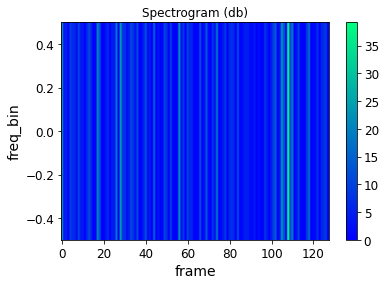

In [14]:
vis_layers = [1,2,3,5]
vis_outputs = [model.layers[i] for i in vis_layers]
vis_model = keras.Model(inputs=model.input, outputs=model.get_layer('conv1d_1').output)
for x,y in train_ds.take(1):
    #plot_spectrogram(x[1,:,:], title="Input")
    plot_spectrogram(tf.reshape(vis_model(x), [1, 128, -1])[:,:,1])